In [1]:
import numpy as np
import mne
import pandas as pd

import lab2_pt1 as lab2_pt1

%matplotlib inline

In [2]:
ELECTRODE_NAMES = ['FP1', 'FP2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2']
ELECTRODE_MONTAGE = {
    "FP1": np.array([-3.022797, 10.470795, 7.084885]),
    "FP2": np.array([2.276825, 10.519913, 7.147003]),
    "C3": np.array([-7.339218, -0.774994, 11.782791]),
    "C4": np.array([6.977783, -1.116196, 12.059814]),
    "P7": np.array([-7.177689, -5.466278, 3.646164]),
    "P8": np.array([7.306992, -5.374619, 3.843689]),
    "O1": np.array([-2.681717, -9.658279, 3.634674]),
    "O2": np.array([2.647095, -9.638092, 3.818619])
}

BAND_START = 0.1
BAND_STOP = 120


def get_eeg_as_numpy_array(data_df):
    """ Returns a numpy array of dimension (# of EEG channels) x
    (# of samples), containing only EEG channel data present in
    <data_df>. The order of the rows is in ascending numeric order
    found in the initial file ordering:

        EEG Channel 1, 2, ... (# of channels)

    data_df: a pandas dataframe, with format as defined by the return
    value of lab2.load_recording_file
    """
    # Initialize a list to store the EEG data
    eeg_data = []

    # iterates through columns in the dataframe
    channel_number = 0
    for col_name in data_df.columns.values:
        if lab2_pt1.is_eeg(col_name):
            print(col_name)
            eeg_data.append(data_df[col_name].to_numpy())  
            channel_number += 1
    
    # Convert the list of EEG data to a NumPy array
    eeg_data_array = np.vstack(eeg_data)
    print(eeg_data_array.shape)
    
    return eeg_data_array


def construct_mne(data_df):
    """ Returns an MNE Raw object, consisting of lab2.NUM_CHANNELS
    channels of EEG data.

    data_df: a pandas dataframe, with format as defined by the return
    value of lab2.load_recording_file
    """
    # Get eeg data array
    eeg_data = get_eeg_as_numpy_array(data_df)

    # Create MNE Info structure
    channel_types = ['eeg'] * len(ELECTRODE_NAMES)  # Set channel types as EEG
    info = mne.create_info(ch_names=ELECTRODE_NAMES, sfreq=lab2_pt1.SAMPLE_RATE, ch_types=channel_types)

    # Create MNE Raw object
    raw = mne.io.RawArray(eeg_data, info)

    # Create the montage using the electrode 3D locations
    montage = mne.channels.make_dig_montage(ch_pos=ELECTRODE_MONTAGE, coord_frame="head")

    # Set the montage on the Raw object
    raw.set_montage(montage)
    
    return raw
    
def show_psd(data_mne, fmin=0, fmax=np.inf):
    """ Plots the power spectral density of the EEG signals in
    <data_mne>, limiting the range of the horizontal axis of the plot to
    [fmin, fmax].

    data_mne: MNE Raw object
    fmin: lower end of horizontal axis range
    fmax: upper end of horizontal axis range
    """
    
    # Compute the PSD using the Welch method
    spectrum = data_mne.compute_psd(fmin=fmin, fmax=fmax)
    spectrum.plot(amplitude=False)


def filter_band_pass(data_mne):
    """ Mutates data_mne, applying a band-pass filter
    with band defined by BAND_START and BAND_STOP, where
    BAND_START < BAND_STOP.

    data_mne: MNE Raw object
    """
    data_mne_filtered = data_mne.filter(l_freq=BAND_START, h_freq=BAND_STOP)
    return data_mne_filtered


def filter_notch_60(data_mne):
    """ Mutates data_mne, applying a notch filter
    to remove 60 Hz electrical noise

    data_mne: MNE Raw object
    """
    data_mne_filtered = data_mne.notch_filter(freqs=60.0)
    return data_mne_filtered

eeg ch1
eeg ch2
eeg ch3
eeg ch4
eeg ch5
eeg ch6
eeg ch7
eeg ch8
(8, 4887)
Creating RawArray with float64 data, n_channels=8, n_times=4887
    Range : 0 ... 4886 =      0.000 ...    19.544 secs
Ready.
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 

c:\Users\yuans\miniconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
c:\Users\yuans\miniconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 122.50 Hz)
- Filter length: 8251 samples (33.004 s)

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


C:\Users\yuans\AppData\Local\Temp\ipykernel_32632\843364681.py:93: RuntimeWarning: filter_length (8251) is longer than the signal (4887), distortion is likely. Reduce filter length or filter a longer signal.
  data_mne_filtered = data_mne.filter(l_freq=BAND_START, h_freq=BAND_STOP)
c:\Users\yuans\miniconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


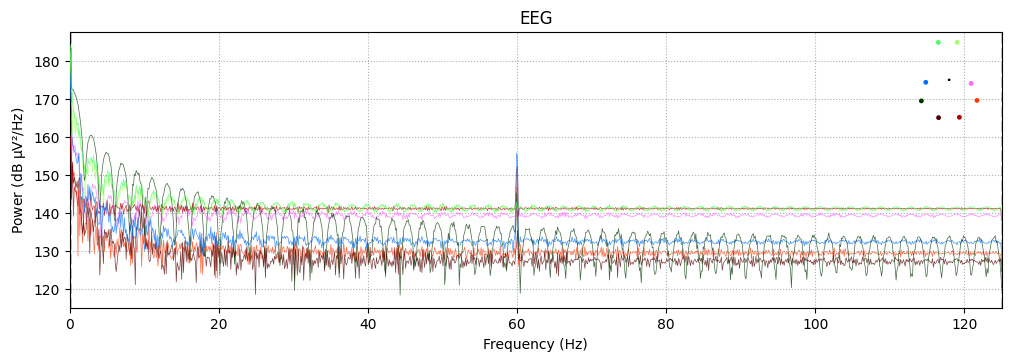

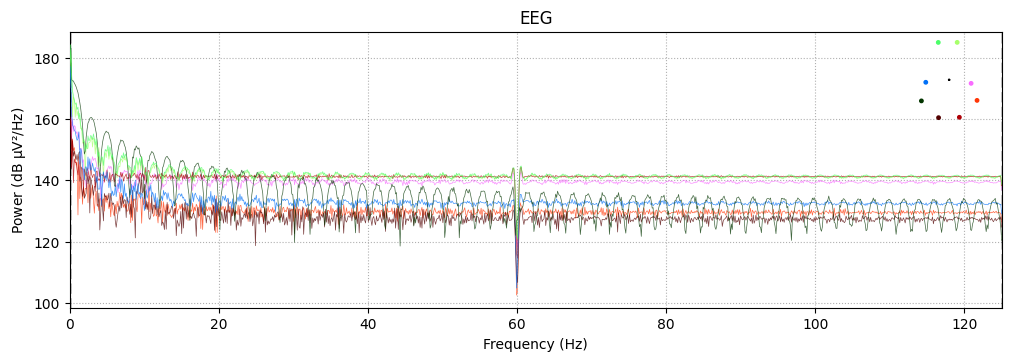

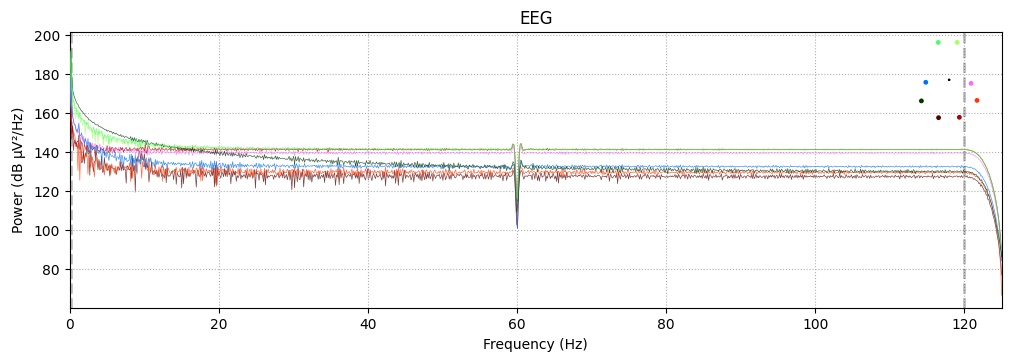

In [3]:
data_df = lab2_pt1.load_recording_file("Closed_3.txt")

pd.set_option('display.max_columns', None)

mne_raw = construct_mne(data_df)

# show psd of pre filtered data
show_psd(mne_raw)

# show psd of 60Hz notch filtered data
mne_notch = filter_notch_60(mne_raw)
show_psd(mne_notch)

# show psd of 60HZ notch and band filtered data
mne_botch_band = filter_band_pass(mne_notch)
show_psd(mne_botch_band)